* Here we are playing with all the hyperparameter techniques, we will see which gives the better performance.
* I am taking advertisement dataset, you can download this dataset from this link  https://www.kaggle.com/bumba5341/advertisingcsv
* Download all the libraries or dependencies 



## Import all the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import warnings
warnings.filterwarnings('ignore')

## Reading data through pandas dataframe

In [ ]:
df=pd.read_csv('Advertising.csv')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## EDA

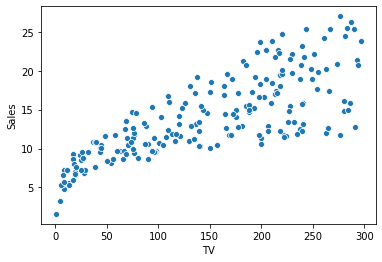

In [ ]:
sns.scatterplot(data=df,x='TV',y='Sales')

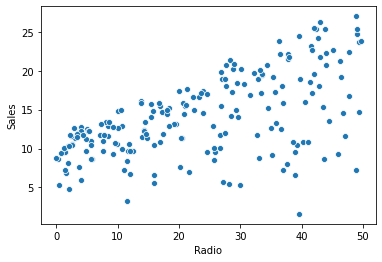

In [ ]:
sns.scatterplot(data=df,x='Radio',y='Sales')

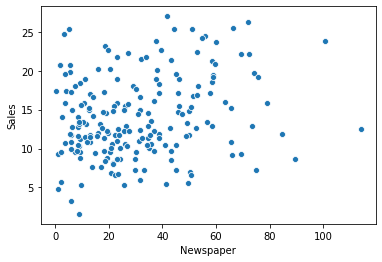

In [ ]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')

We can see there is a upward trend in both advertising mediums (TV and Radio), opposite there is no trend in Newspaper. 

In [ ]:
# Check is there any null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [ ]:
# apply scaling to convert all the independent variables in the same range of values.
scaler=StandardScaler()
X=scaler.fit_transform(X)

## Train Test Spliting

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


## Training the model with default parameters

In [ ]:
# I am taking Random Forest Regressor as my model

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.98
Adjusted R_squared: 0.98
------------------------
Loss Function
RMSE Score: 0.76
------------------------


We got 0.98 adjusted r_squared which shows how our regressor line best fitted with our data.

## Applying Hyperparameter Tuning Techniques

#### What are the hyperparameters do we have in Random Forest Regressor?

* max_depth = maximum number of levels allowed in each tree.
* max_features = maximum number of features considered when splitting a node.
* min_samples_leaf = minimum number of samples which can be stored in a tree leaf.
* min_samples_split = minimum number of samples necessary in a node to cause node splitting.
* n_estimators = number of trees.

### 1.  Manual Search

Here we manually adjust the parameters till we get the satisfactory score.

In [ ]:

rf=RandomForestRegressor(n_estimators=2000,max_depth=8, max_features='sqrt')
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.89
Adjusted R_squared: 0.88
------------------------
Loss Function
RMSE Score: 1.82
------------------------


I have run this code 4 times with different different parameters and this is the best score I have got.

### 2. Grid Search
here we first create the grid of the parameters that we want to tune. then we will give these parameters to GridSearchCV function.

In [ ]:
params={
               'max_depth': [2,4,6,8,10,None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': [i for i in range(100,2000,200)]}
rf=RandomForestRegressor()

gridsearch=GridSearchCV(rf,param_grid=params,cv=3)

gridsearch.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
  

It took me 4-5 hrs to run this code

In [ ]:
y_pred=gridsearch.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.96
Adjusted R_squared: 0.96
------------------------
Loss Function
RMSE Score: 1.07
------------------------


We can see it's performing well as compare to manual search

### 2. Random Search
here we do the same as we did in the the grid search only we provide the parameters to the RandomizedSeachCV function rather than GridSeachCV

In [ ]:
params={
               'max_depth': [2,4,6,8,10,15,20,25,30,None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': [i for i in range(100,2000,200)]}
rf=RandomForestRegressor()

randomsearch=RandomizedSearchCV(rf,param_distributions=params,cv=3)

randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

it took me 10-15 seconds to run this code, we can observe how faster it is than the grid search.

In [ ]:
y_pred=randomsearch.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.94
Adjusted R_squared: 0.94
------------------------
Loss Function
RMSE Score: 1.29
------------------------


Performing not well compare to the grid search

### 3. Bayesian Optimization
It can be implemented by giving 3 three main parameters to the function fmin().

* Objective Function = defines the loss function to minimize.

* Domain Space = defines the range of input values to test (in Bayesian Optimization this space creates a probability distribution for each of the used Hyperparameters).

* Optimization Algorithm = defines the search algorithm to use to select the best input values to use in each new iteration.

In [ ]:
space = {
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [100,300,500,800,1000,1200])
    }

def objective(space):
    model = RandomForestRegressor(max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 3).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
result = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 90,
            trials= trials)

result


100%|██████████| 90/90 [03:28<00:00,  2.32s/it, best loss: -0.9651915846884708]


{'max_depth': 200.0,
 'max_features': 0,
 'min_samples_leaf': 0.005662939495810759,
 'min_samples_split': 0.01328446314477047,
 'n_estimators': 5}

Result will look like what happened with my code how can we got the max_features as value 0. don't worry 0 is the index value of that parameter. so create a dictionary for only those parameters which got 0,1 or any index values. In my case we have max_features and n_estimators are there.

In [ ]:
# creating dictionary
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 100, 1: 300, 2: 500, 3: 800, 4: 1000,5:1200}


randomforest = RandomForestRegressor( 
                                       max_depth = result['max_depth'], 
                                       max_features = feat[result['max_features']], 
                                       min_samples_leaf = result['min_samples_leaf'], 
                                       min_samples_split = result['min_samples_split'], 
                                       n_estimators = est[result['n_estimators']]
                                      ).fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.98
Adjusted R_squared: 0.98
------------------------
Loss Function
RMSE Score: 0.79
------------------------


We can see the performance of Bayesian Optimization, it is performing well than 3 techniques that we have already used.

### 4. Artificial Neural Network hyperparameter tuning

In [ ]:
def ANN_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= X_train.shape[1], activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1,activation='relu'))
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'linear']
neurons = [5, 10, 15, 25, 35, 50]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

reg = KerasRegressor(build_fn= ANN_Model,epochs= 80, batch_size=40, verbose= 0)

model = GridSearchCV(estimator= reg, param_grid=param_grid, n_jobs=-1)
model.fit(X_train,y_train)

print("Min Loss Registred: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

Min Loss Registred: -0.973 using {'activation': 'relu', 'neurons': 25, 'optimizer': 'SGD'}


We got the Minimum loss with the parameters that help us.

In [ ]:
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
SS_Residual = sum((y_test-y_pred)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('Performance of our model')
print('------------------------')
print('R_Squared: {:.2f}'.format(r_squared))
print('Adjusted R_squared: {:.2f}'.format(adjusted_r_squared))
print('------------------------')
print('Loss Function')
print('RMSE Score: {:.2f}'.format(rmse))
print('------------------------')

Performance of our model
------------------------
R_Squared: 0.99
Adjusted R_squared: 0.98
------------------------
Loss Function
RMSE Score: 0.64
------------------------


It is performing better than all the techniques we used.